In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression

# FUNCTIONS

In the dollow we have the function for filling missing values with random forest, but in our case is not optimal, we going to use interpolation instead.
Interpolation is best suited for continuous data where there is a clear trend or pattern. For example, time series data like stock prices or temperature readings.

In [2]:
# def impute_missing_values_with_random_forest_v2(df_energy, column_name, n_estimators=50, max_depth=10, n_jobs=-1, feature_selection=False, k=10):
#     # Select only numerical columns (excluding the target column)
#     numerical_columns = df_energy.select_dtypes(include=['int64', 'float64']).columns.tolist()
#     if column_name in numerical_columns:
#         numerical_columns.remove(column_name)

#     # Exclude columns with NaN values
#     numerical_columns = [col for col in numerical_columns if not df_energy[col].isna().any()]

#     # Splitting the data into two parts: one where target column is missing and one where it's not
#     df_energy_with_target = df_energy[df_energy[column_name].notna()] # rows with actual data
#     df_energy_without_target = df_energy[df_energy[column_name].isna()] # rows to be imputed

#     # Prepare the features (X) and target (y) using only numerical columns
#     X = df_energy_with_target[numerical_columns]
#     y = df_energy_with_target[column_name]

#     # Optional feature selection
#     if feature_selection and len(numerical_columns) > k:
#         selector = SelectKBest(f_regression, k=k)
#         X = selector.fit_transform(X, y)
#         selected_features = np.array(numerical_columns)[selector.get_support()]
#     else:
#         selected_features = numerical_columns

#     # print(f"Shape of X: {X.shape}")
#     # print(f"Shape of y: {y.shape}")
#     # print(f"Columns used for prediction: {selected_features}")

#     # Create and train the model
#     model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42, n_jobs=n_jobs)
#     model.fit(X, y)

#     # Prepare features for rows with missing target
#     if feature_selection and len(numerical_columns) > k:
#         X_missing = selector.transform(df_energy_without_target[numerical_columns])
#     else:
#         X_missing = df_energy_without_target[selected_features]

#     # Predicting the missing values
#     predicted_values = model.predict(X_missing)

#     # Fill in the missing values in the original DataFrame
#     df_energy.loc[df_energy[column_name].isna(), column_name] = predicted_values
    
#     return df_energy


In [3]:
def fill_missing_values_with_interpolation(df, method='linear', limit=None, inplace=True):
    """
    Fill missing values in a DataFrame using interpolation.

    Parameters:
    df (pd.DataFrame): The DataFrame containing missing values.
    method (str): The interpolation method to use. Options include 'linear', 'time', 'index', 'values', 'pad', 'nearest', 'polynomial', 'spline'.
                  Default is 'linear'.
    limit (int): Maximum number of consecutive NaNs to fill. Must be greater than 0. Default is None (no limit).
    inplace (bool): If True, do the operation in place. Default is False.

    Returns:
    pd.DataFrame: DataFrame with missing values filled.
    """
    if inplace:
        df.interpolate(method=method, limit=limit, inplace=True)
        return df
    else:
        return df.interpolate(method=method, limit=limit)

# READ DATASET AND DEFINE FEATURES

REMEMBER: specify that the time column contains a datetime, because it ensures that the plotting library interprets the data correctly and allows for more meaningful and accurate visualizations

In [4]:
df_energy = pd.read_csv('dataset/energy_dataset.csv')
df_energy['time'] = pd.to_datetime(df_energy['time'])

**COLUMNS**
1. **time:** The timestamp indicating the specific hour for which the data is recorded.

2. **generation biomass:** The amount of electricity generated from biomass sources (measured in MW).

3. **generation fossil brown coal/lignite:** The amount of electricity generated from brown coal or lignite sources (measured in MW).

4. **generation fossil coal-derived gas:** The amount of electricity generated from gas derived from coal (measured in MW).

5. **generation fossil gas:** The amount of electricity generated from natural gas (measured in MW).

6. **generation fossil hard coal:** The amount of electricity generated from hard coal (measured in MW).

7. **generation fossil oil:** The amount of electricity generated from oil (measured in MW).

8. **generation fossil oil shale:** The amount of electricity generated from oil shale (measured in MW).

9. **generation fossil peat:** The amount of electricity generated from peat (measured in MW).

10. **generation geothermal:** The amount of electricity generated from geothermal sources (measured in MW).

11. **generation hydro pumped storage aggregated:** The total amount of electricity generated from pumped hydro storage (measured in MW).

12. **generation hydro pumped storage consumption:** The amount of electricity consumed to pump water back into storage for hydro pumped storage systems (measured in MW).

13. **generation hydro run-of-river and poundage:** The amount of electricity generated from run-of-river and poundage hydro sources (measured in MW).

14. **generation hydro water reservoir:** The amount of electricity generated from hydro reservoirs (measured in MW).

15. **generation marine:** The amount of electricity generated from marine sources (e.g., tidal or wave energy) (measured in MW).

16. **generation nuclear:** The amount of electricity generated from nuclear sources (measured in MW).

17. **generation other:** The amount of electricity generated from other unspecified sources (measured in MW).

18. **generation other renewable:** The amount of electricity generated from other renewable sources not specifically categorized (measured in MW).

19. **generation solar:** The amount of electricity generated from solar power (measured in MW).

20. **generation waste:** The amount of electricity generated from waste-to-energy processes (measured in MW).

21. **generation wind offshore:** The amount of electricity generated from offshore wind turbines (measured in MW).

22. **generation wind onshore:** The amount of electricity generated from onshore wind turbines (measured in MW).

23. **forecast solar day ahead:** The forecasted amount of electricity generation from solar power for the following day (measured in MW).

24. **forecast wind offshore day ahead:** The forecasted amount of electricity generation from offshore wind turbines for the following day (measured in MW).

25. **forecast wind onshore day ahead:** The forecasted amount of electricity generation from onshore wind turbines for the following day (measured in MW).

26. **total load forecast:** The forecasted total electrical load (demand) for the specified hour (measured in MW).

27. **total load actual:** The actual total electrical load (demand) for the specified hour (measured in MW).

28. **price day ahead:** The forecasted electricity price for the following day (measured in EUR/MWh).

29. **price actual:** The actual electricity price for the specified hour (measured in EUR/MWh).

# EDA

In [5]:
df_energy.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [6]:
df_energy.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35045.000000,35046.000000,35046.0,35046.000000,35046.000000,35045.000000,35046.0,35046.0,35046.0,0.0,...,35045.000000,35046.0,35046.000000,35064.000000,0.0,35064.000000,35064.000000,35028.000000,35064.000000,35064.000000
mean,383.513540,448.059208,0.0,5622.737488,4256.065742,298.319789,0.0,0.0,0.0,NaN,...,269.452133,0.0,5464.479769,1439.066735,NaN,5471.216689,28712.129962,28696.939905,49.874341,57.884023
std,85.353943,354.568590,0.0,2201.830478,1961.601013,52.520673,0.0,0.0,0.0,NaN,...,50.195536,0.0,3213.691587,1677.703355,NaN,3176.312853,4594.100854,4574.987950,14.618900,14.204083
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,...,0.000000,0.0,0.000000,0.000000,NaN,237.000000,18105.000000,18041.000000,2.060000,9.330000
25%,333.000000,0.000000,0.0,4126.000000,2527.000000,263.000000,0.0,0.0,0.0,NaN,...,240.000000,0.0,2933.000000,69.000000,NaN,2979.000000,24793.750000,24807.750000,41.490000,49.347500
50%,367.000000,509.000000,0.0,4969.000000,4474.000000,300.000000,0.0,0.0,0.0,NaN,...,279.000000,0.0,4849.000000,576.000000,NaN,4855.000000,28906.000000,28901.000000,50.520000,58.020000
75%,433.000000,757.000000,0.0,6429.000000,5838.750000,330.000000,0.0,0.0,0.0,NaN,...,310.000000,0.0,7398.000000,2636.000000,NaN,7353.000000,32263.250000,32192.000000,60.530000,68.010000
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,...,357.000000,0.0,17436.000000,5836.000000,NaN,17430.000000,41390.000000,41015.000000,101.990000,116.800000


In [7]:
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

In [8]:
df_energy.isnull().sum()

time                                               0
generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                              

In order to not lose original data, we copy our dataframe to the variable copy_df_energy and we'll continue to work with df_energy variable.

In [9]:
copy_df_energy = df_energy.copy()

In [10]:
df_energy.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')

###  CLEANING DATASET AND HANDLING NULL VALUES

We decided to drop some column because there is no collected data in them and they are variables that we cannot fill by ourself because they must be collected with a "tool": 
1. generation hydro pumped storage aggregated 
2. forecast wind offshore eday ahead

In [11]:
df_energy = df_energy.drop(columns=['generation hydro pumped storage aggregated', 'forecast wind offshore eday ahead'])

#### Correlation

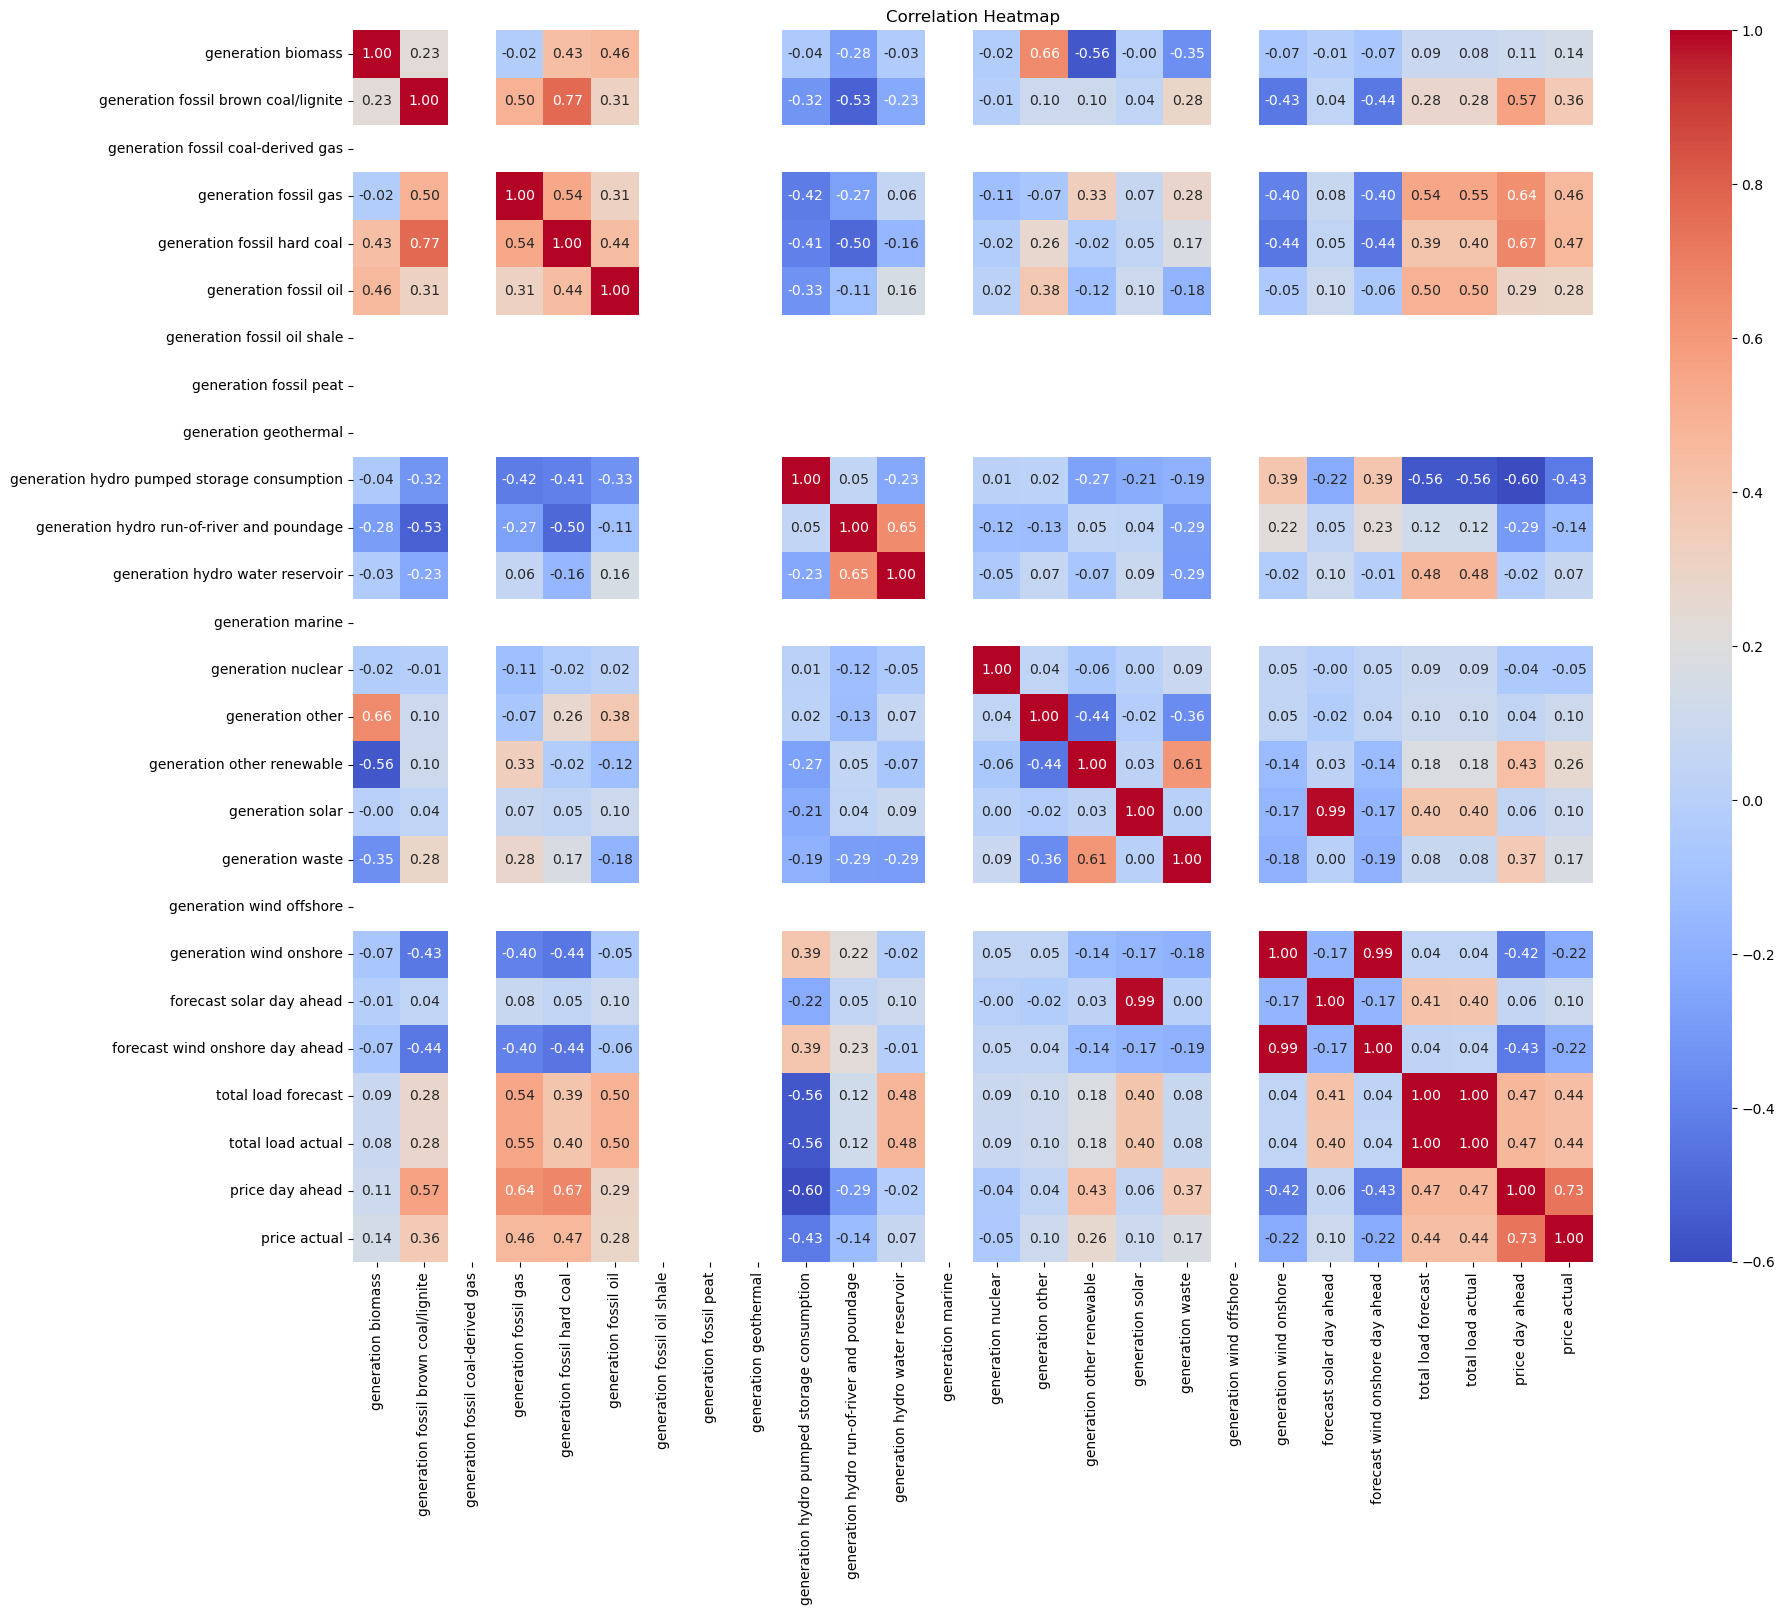

In [12]:
energy_corr = df_energy.drop(columns=['time'])
corr_energy = energy_corr.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(corr_energy, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

We decided to drop features that have not correlation with any of other features, so they useless for our analysis.
1. 'generation fossil coal-derived gas'
2. 'generation fossil oil shale', 
3. 'generation fossil peat', 
4. 'generation geothermal', 
6. 'generation marine', 
7. 'generation wind offshore', 

We decided to drop features that have collinearity with other features, so they useless for our analysis: because collinearity will reduce the accuracy of the estimates.
- 'forecast wind onshore day ahead'
- 'forecast solar day ahead',
- 'total load forecast'


In [13]:
df_energy=df_energy.drop(['generation fossil coal-derived gas','generation fossil oil shale', 
                            'generation fossil peat', 'generation geothermal', 'generation marine', 
                            'generation wind offshore', 
                            'total load forecast', 'forecast solar day ahead',
                            'forecast wind onshore day ahead'], 
                            axis=1)

In [14]:
#df_energy.info()

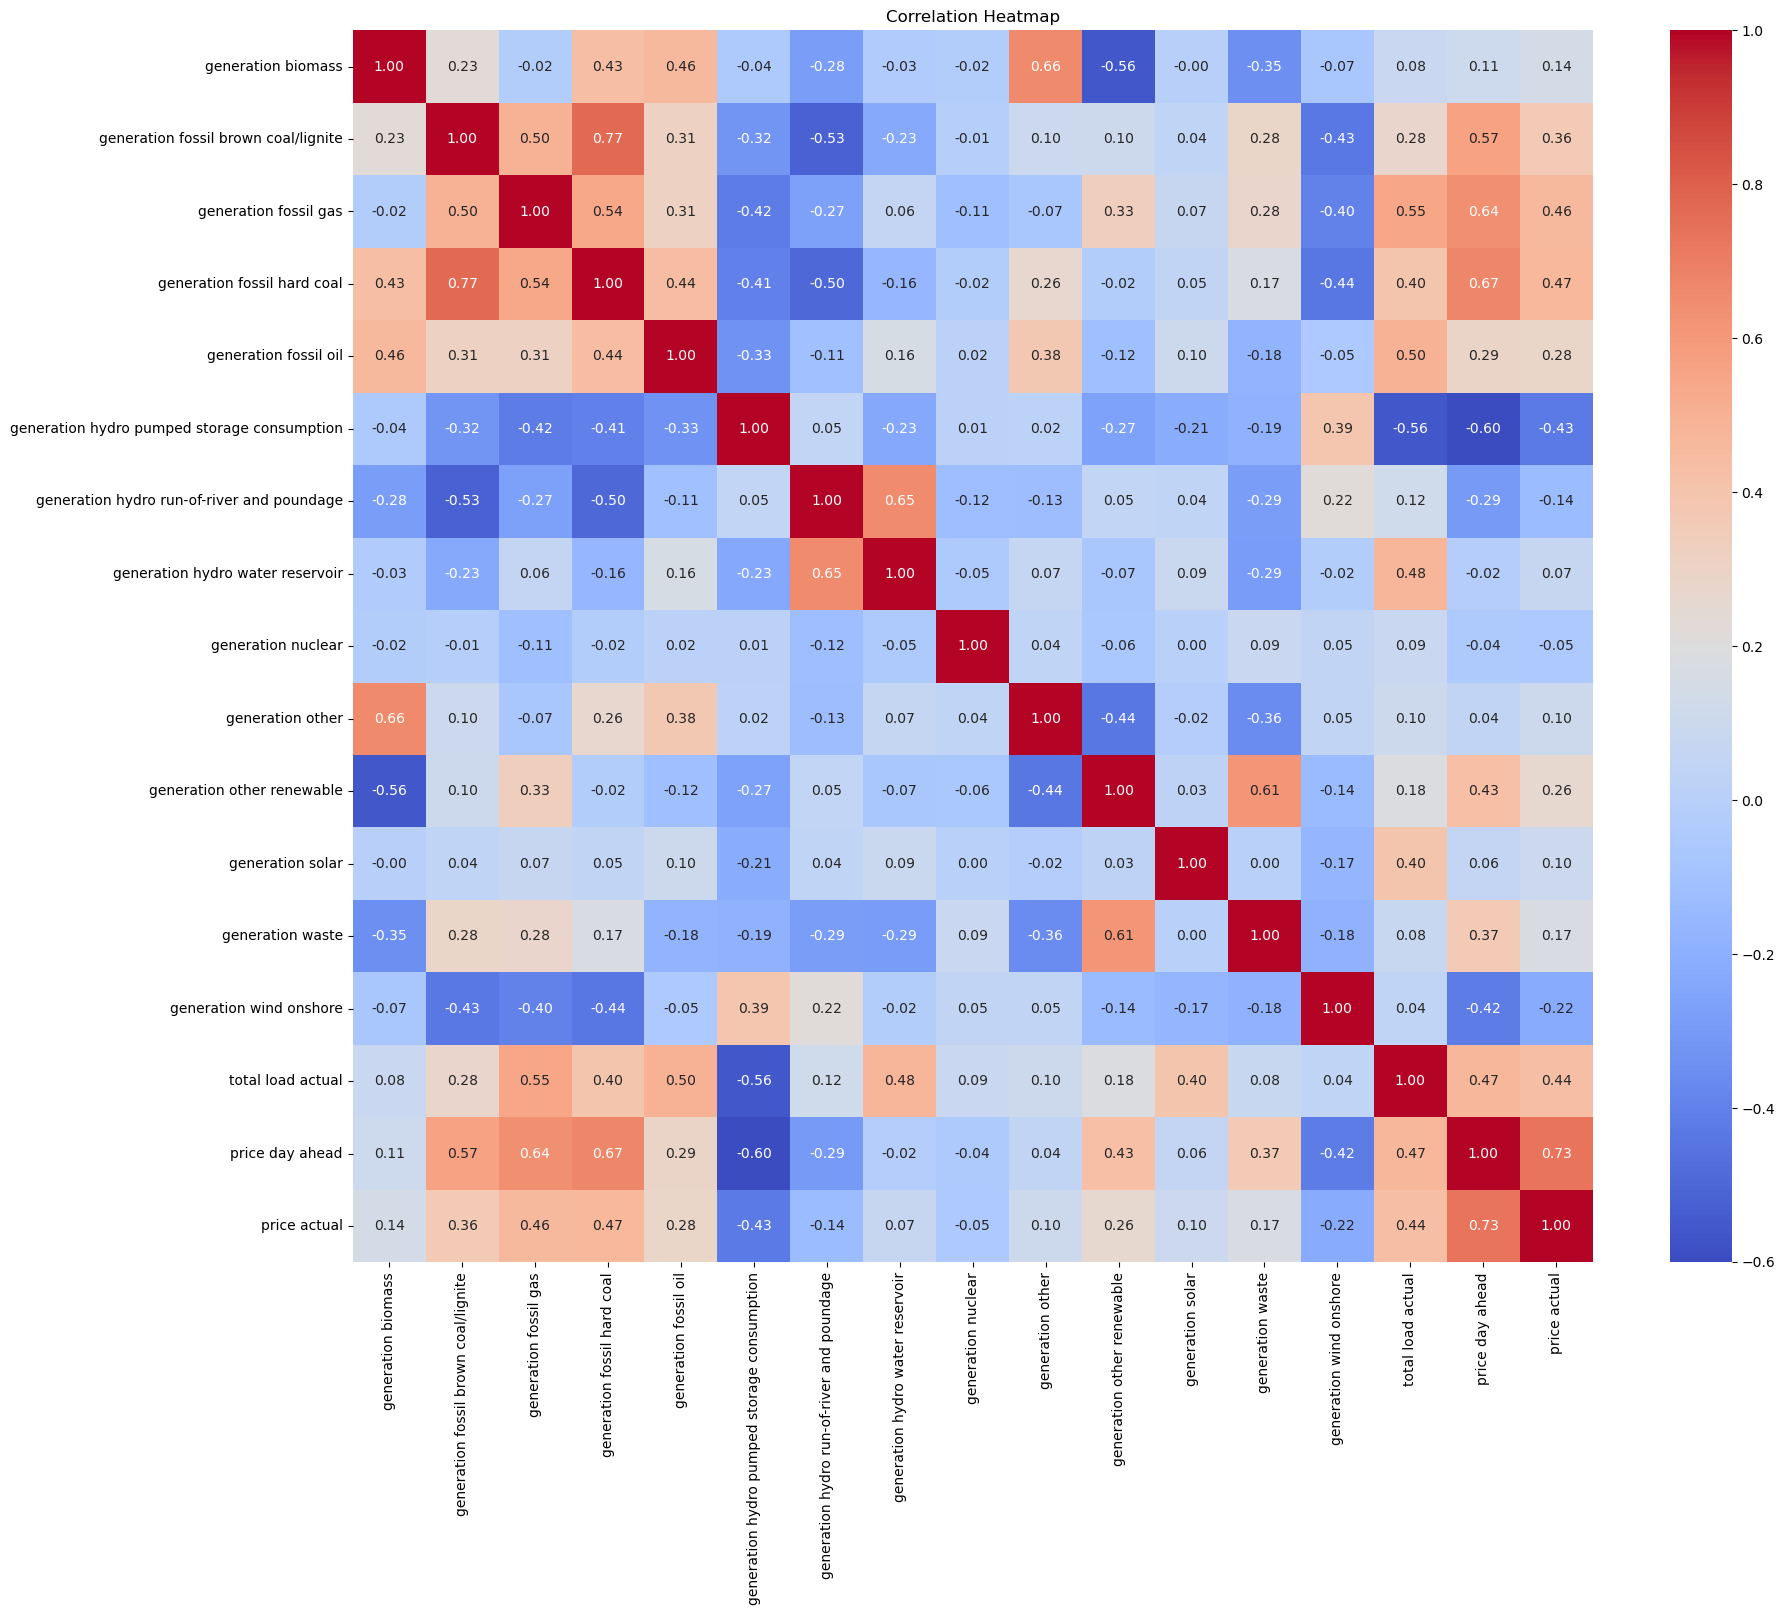

In [15]:
energy_corr = df_energy.drop(columns=['time'])
corr_energy = energy_corr.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(corr_energy, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Check if there are duplicates

In [16]:
# Find NaNs and duplicates in df_energy
print('There are {} missing values or NaNs in df_energy.'
      .format(df_energy.isnull().values.sum()))

temp_energy = df_energy.duplicated(keep='first').sum()

print('There are {} duplicate rows in df_energy based on all columns.'
      .format(temp_energy))

There are 292 missing values or NaNs in df_energy.
There are 0 duplicate rows in df_energy based on all columns.


In [17]:
df_energy.isnull().sum()

time                                            0
generation biomass                             19
generation fossil brown coal/lignite           18
generation fossil gas                          18
generation fossil hard coal                    18
generation fossil oil                          19
generation hydro pumped storage consumption    19
generation hydro run-of-river and poundage     19
generation hydro water reservoir               18
generation nuclear                             17
generation other                               18
generation other renewable                     18
generation solar                               18
generation waste                               19
generation wind onshore                        18
total load actual                              36
price day ahead                                 0
price actual                                    0
dtype: int64

**IMPUTE MISSING VALUES WITH RANDOM FOREST**

In [18]:
for column in df_energy.columns:
    if df_energy[column].isna().any():
        df_energy = fill_missing_values_with_interpolation(df_energy)

In [19]:
df_energy.isnull().sum()

time                                           0
generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind onshore                        0
total load actual                              0
price day ahead                                0
price actual                                   0
dtype: int64

# PLOTS

### Correlation

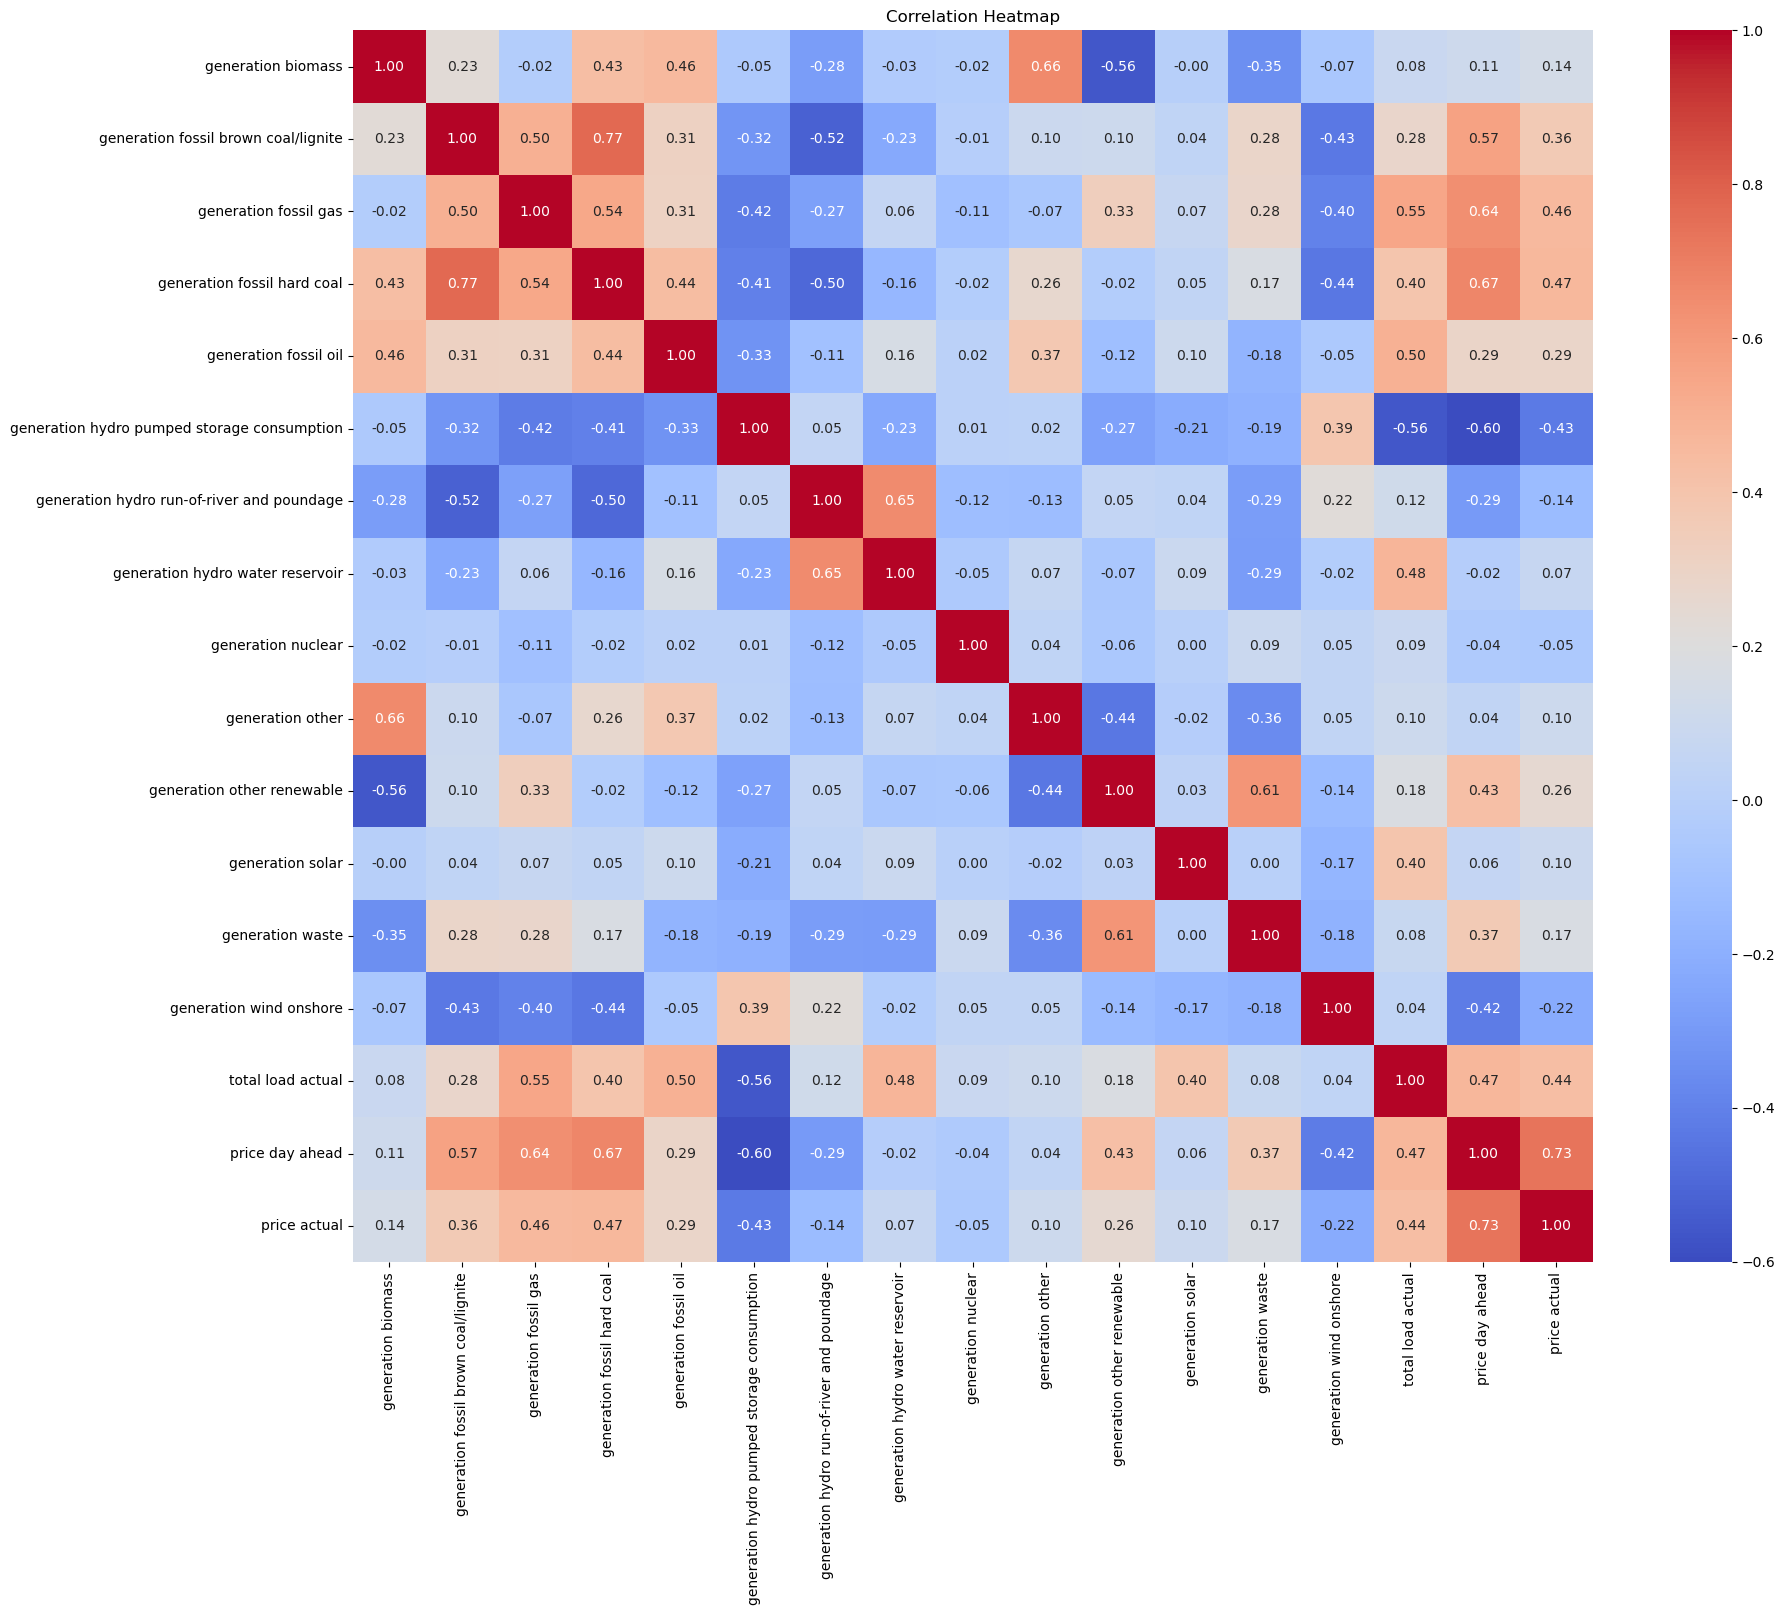

In [20]:
energy_corr = df_energy.drop(columns=['time'])
corr_energy = energy_corr.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(corr_energy, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [21]:
df_energy.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore', 'total load actual',
       'price day ahead', 'price actual'],
      dtype='object')

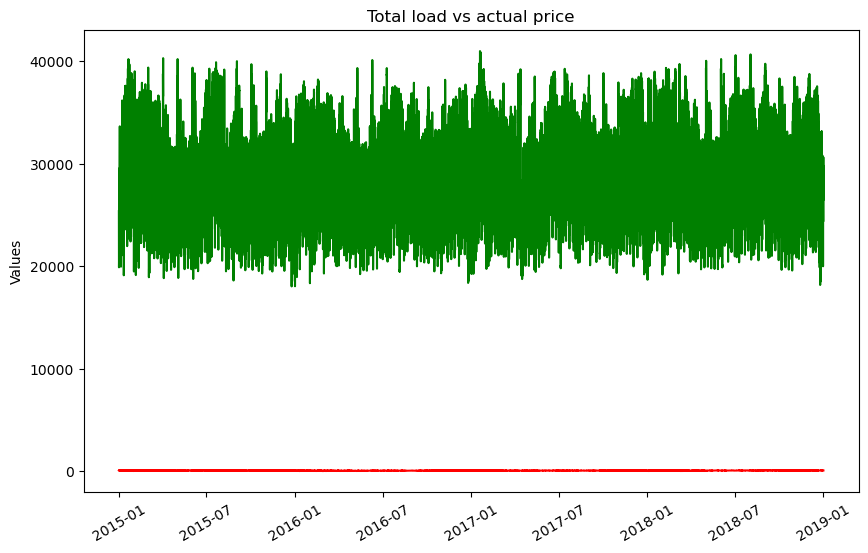

In [22]:
plt.figure(figsize=(10,6))
plt.plot(df_energy['time'], df_energy['total load actual'], label='Load', color='green')
plt.plot(df_energy['time'],  df_energy['price actual'], label='Price', color='red')
plt.ylabel("Values")
plt.title('Total load vs actual price')
plt.xticks(rotation=30)
plt.show()

Correlation of prices with other features. Prices are influenced mostly by: 
- *generation fossil brown coal/lignite* 
- *generation fossil gas*
- *generation fossil hard coal* 

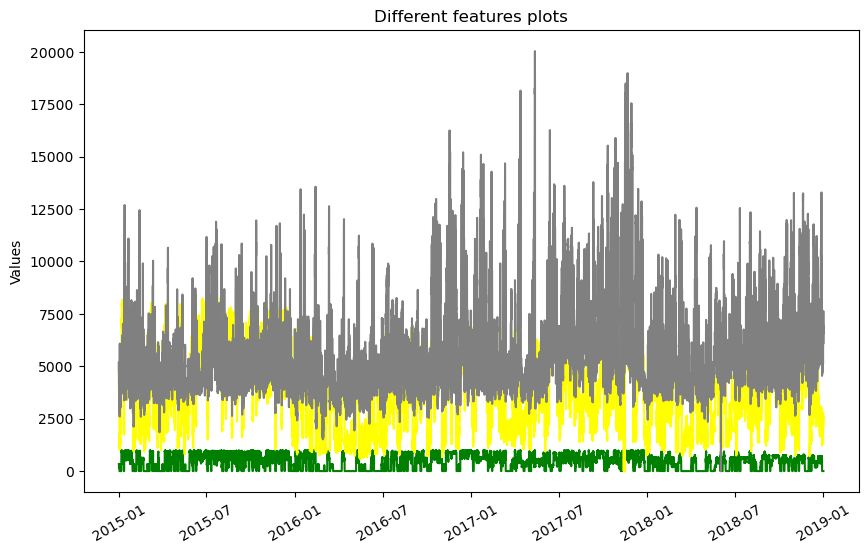

In [23]:
plt.figure(figsize=(10,6))
plt.plot(df_energy['time'], df_energy['generation fossil brown coal/lignite'], label='generation fossil brown coal/lignite', color='green')
plt.plot(df_energy['time'], df_energy['generation fossil hard coal'], label='generation fossil hard coal', color='yellow')
plt.plot(df_energy['time'], df_energy['generation fossil gas'], label='generation fossil gas', color='grey')
#plt.plot(df_energy['time'], df_energy['price day ahead'], label='price day ahead', color='red')
# plt.xlabel('Time')
plt.ylabel("Values")
plt.title('Different features plots')
plt.xticks(rotation=30)
plt.show()

Comparing *price day ahead*, *price actual*

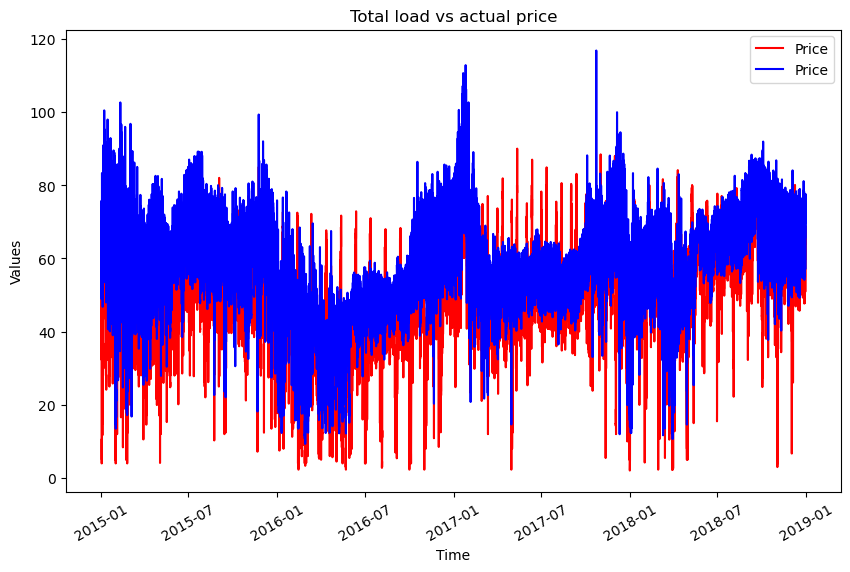

In [24]:
plt.figure(figsize=(10,6))
plt.plot(df_energy['time'],  df_energy['price day ahead'], label='Price', color='red')
plt.plot(df_energy['time'],  df_energy['price actual'], label='Price', color='blue')
plt.xlabel('Time')
plt.ylabel("Values")
plt.title('Total load vs actual price')
plt.xticks(rotation=30)
plt.legend()
plt.show()

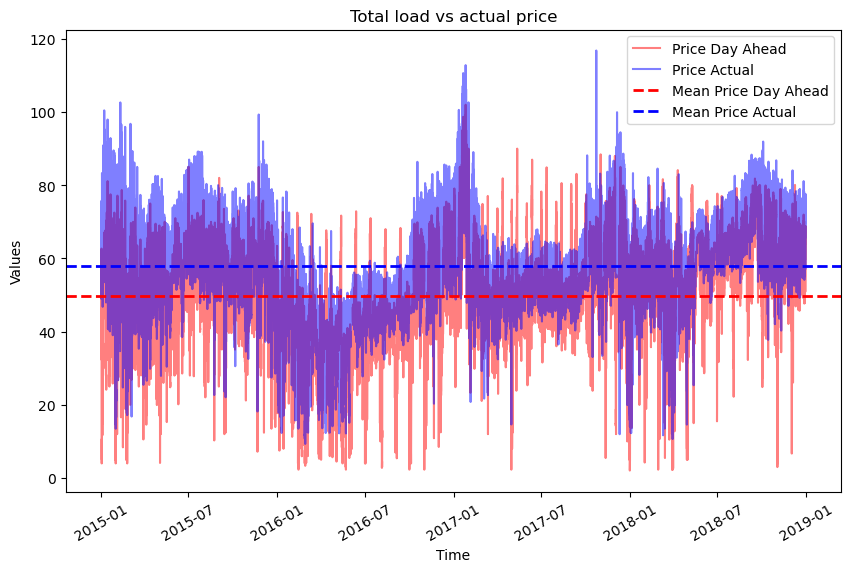

In [25]:
import matplotlib.pyplot as plt

# Calculate the mean values
mean_price_day_ahead = df_energy['price day ahead'].mean()
mean_price_actual = df_energy['price actual'].mean()

plt.figure(figsize=(10, 6))

# Plotting the actual values
plt.plot(df_energy['time'], df_energy['price day ahead'], label='Price Day Ahead', color='red', alpha=0.5)
plt.plot(df_energy['time'], df_energy['price actual'], label='Price Actual', color='blue', alpha=0.5)

# Plotting the mean values as horizontal lines
plt.axhline(mean_price_day_ahead, color='red', linestyle='--', linewidth=2, label='Mean Price Day Ahead')
plt.axhline(mean_price_actual, color='blue', linestyle='--', linewidth=2, label='Mean Price Actual')

plt.xlabel('Time')
plt.ylabel("Values")
plt.title('Total load vs actual price')
plt.xticks(rotation=30)
plt.legend()  # Add a legend to distinguish between the lines
plt.show()


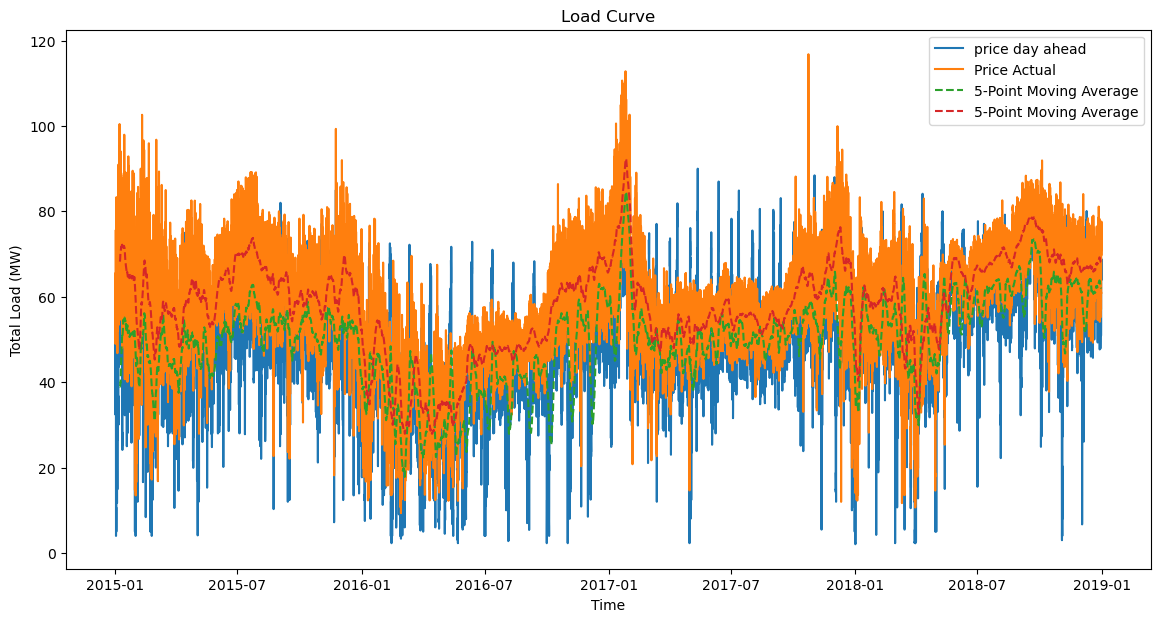

In [26]:
# Plot total load actual over time
plt.figure(figsize=(14, 7))

# Calculate the 5-point moving average of 'total load actual'
df_energy['price day ahead 5 MA'] = df_energy['price day ahead'].rolling(window=24*7).mean()
df_energy['price actual 5 MA'] = df_energy['price actual'].rolling(window=24*7).mean()

plt.plot(df_energy['time'], df_energy['price day ahead'], label='price day ahead')
plt.plot(df_energy['time'], df_energy['price actual'], label='Price Actual')

plt.plot(df_energy['time'], df_energy['price day ahead 5 MA'], label='5-Point Moving Average', linestyle='--')
plt.plot(df_energy['time'], df_energy['price actual 5 MA'], label='5-Point Moving Average', linestyle='--')


#plt.plot(df_energy_weather['time'], df_energy_weather['total load forecast'], label='Total Load Actual')
plt.xlabel('Time')
plt.ylabel('Total Load (MW)')
plt.title('Load Curve')
plt.legend()
plt.show()

Plotting positively correlated features, such as *generation fossil brown coal/lignite* , *generation fossil hard coal* , *generation fossil gas* , *generation fossil oil*.



In [27]:
# plt.figure(figsize=(10,6))
# plt.plot(df_energy['time'], df_energy['generation fossil brown coal/lignite'], label='generation fossil brown coal/lignite')
# plt.plot(df_energy['time'], df_energy['generation fossil hard coal'], label='generation fossil hard coal')
# plt.plot(df_energy['time'], df_energy['generation fossil gas'], label='generation fossil gas')
# plt.plot(df_energy['time'], df_energy['generation fossil oil'], label='generation fossil oil')
# plt.xlabel('Time')
# plt.ylabel("Values")
# plt.title('Different features plots')
# plt.xticks(rotation=30)
# plt.show()

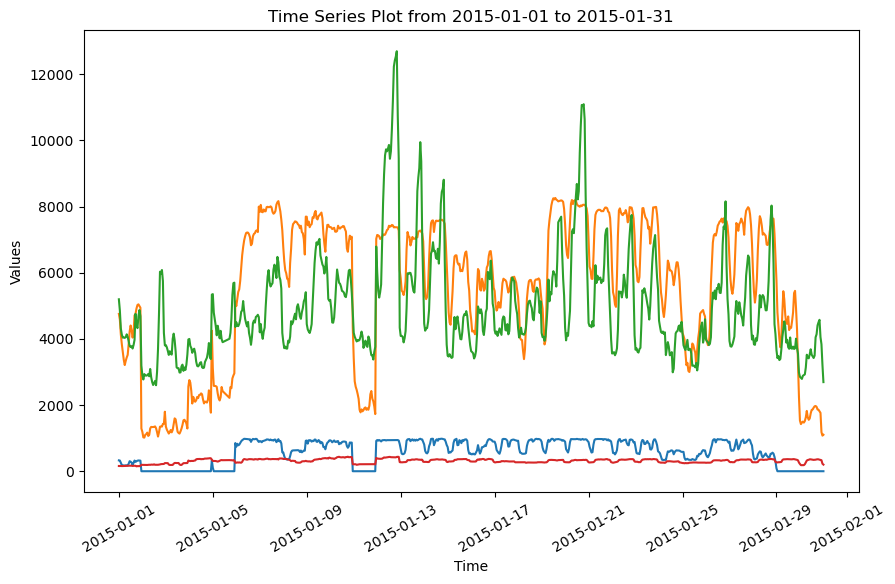

In [28]:
df_energy['time'] = pd.to_datetime(df_energy['time'], utc=True)
# Define the date range
start_date = '2015-01-01'
end_date = '2015-01-31'

# Filter the data for the date range
mask = (df_energy['time'] >= start_date) & (df_energy['time'] <= end_date)
filtered_df_energy = df_energy.loc[mask]


plt.figure(figsize=(10,6))
plt.plot(filtered_df_energy['time'], filtered_df_energy['generation fossil brown coal/lignite'], label='generation fossil brown coal/lignite')
plt.plot(filtered_df_energy['time'], filtered_df_energy['generation fossil hard coal'], label='generation fossil hard coal')
plt.plot(filtered_df_energy['time'], filtered_df_energy['generation fossil gas'], label='generation fossil gas')
plt.plot(filtered_df_energy['time'], filtered_df_energy['generation fossil oil'], label='generation fossil oil')
plt.xlabel('Time')
plt.ylabel("Values")
plt.title('Time Series Plot from {} to {}'.format(start_date, end_date))
plt.xticks(rotation=30)
plt.show()

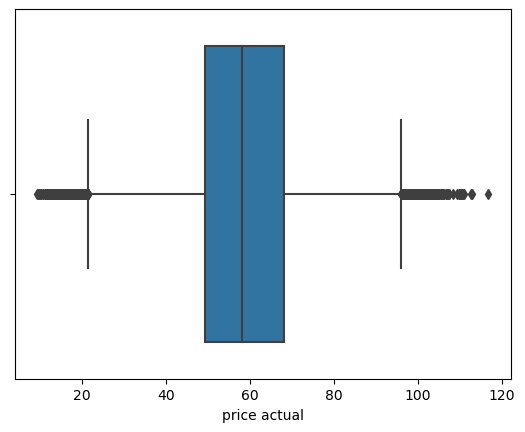

In [50]:
sns.boxplot(x=df_energy['price actual'])
plt.show()

In [52]:
df_energy.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore', 'total load actual',
       'price day ahead', 'price actual', 'price day ahead 5 MA',
       'price actual 5 MA'],
      dtype='object')

#### Compare renewable energies with non renewable energies

In [47]:
# # Assuming start_date and end_date are defined somewhere in our code
# start_date = df_energy['time'].min()
# end_date = df_energy['time'].max()

# Columns for renewable and non-renewable energy
renewable_energy = ['time', 'generation biomass', 'generation waste', 
                    'generation wind onshore', 'total load actual', 'price day ahead', 
                    'generation hydro run-of-river and poundage', 'generation hydro water reservoir', 
                    'generation other renewable', 'generation solar', 'price actual']

non_renewable_energy =[ 'generation fossil brown coal/lignite',  'generation fossil gas',
                        'generation fossil hard coal', 'generation fossil oil', 'time', 
                        'generation waste', 'generation wind onshore', 'total load actual', 
                        'price day ahead', 'price actual']

# Ensure the 'time' column is in datetime format
df_energy['time'] = pd.to_datetime(df_energy['time'], utc=True)

# Creating dataframes
df_energy_renewable_energy = df_energy[renewable_energy]
df_energy_non_renewable_energy = df_energy[non_renewable_energy]

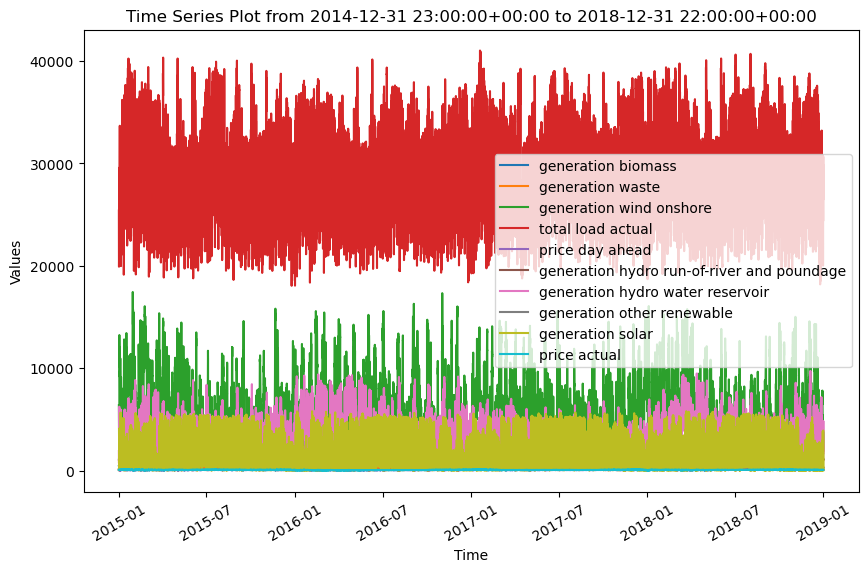

In [48]:
# Plotting renewable energy
plt.figure(figsize=(10, 6))

for col in renewable_energy:
    if col != 'time':  # Skip the 'time' column
        plt.plot(df_energy_renewable_energy['time'], df_energy_renewable_energy[col], label=col)

plt.xlabel('Time')
plt.ylabel("Values")
plt.title('Time Series Plot from {} to {}'.format(start_date, end_date))
plt.xticks(rotation=30)
plt.legend()  # Adding legend to distinguish between different lines
plt.show()


# MODEL